# Recognizing networks in image data

[Run notebook in Google Colab](https://colab.research.google.com/github/pathpy/pathpy/blob/master/doc/tutorial/network_recognition.ipynb)  
[Download notebook](https://github.com/pathpy/pathpy/raw/master/doc/tutorial/network_recognition.ipynb)

In [ ]:
pip install git+git://github.com/pathpy/pathpy.git

In [1]:
import pathpy as pp

# to read and plot image from web url
from matplotlib import pyplot as plt
from skimage import io

# for demo of user-drawn input
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

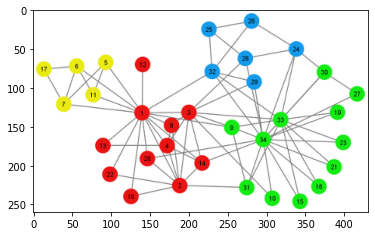

In [5]:
img = io.imread('http://www.ludowaltman.nl/slm/network.png')
plt.imshow(img)

In [2]:
n = pp.io.network_recognition.from_image('http://www.ludowaltman.nl/slm/network.png', num_nodes=34, node_radius=(5,15), threshold=20, max_edge_gap=20, min_edge_length=10, intersect_tolerance_factor=1.5)
print(n)
n.plot()

Uid:			0x18797beb898
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	34
Number of edges:	81


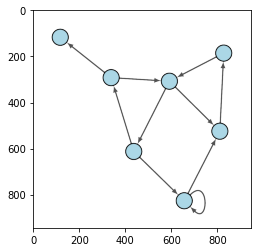

In [175]:
img = io.imread('https://warehouse-camo.ingress.cmh1.psfhosted.org/f84df05d3a3e854421ec0b7a637df194070450dd/68747470733a2f2f6861636b6c2e6769746875622e696f2f6e6574776f726b3274696b7a2f706c6f745f30332e706e67')
plt.imshow(img)

In [181]:
n = pp.io.network_recognition.from_image('https://warehouse-camo.ingress.cmh1.psfhosted.org/f84df05d3a3e854421ec0b7a637df194070450dd/68747470733a2f2f6861636b6c2e6769746875622e696f2f6e6574776f726b3274696b7a2f706c6f745f30332e706e67', sigma=0.1, num_nodes=7, node_radius=(35,45), threshold=2, max_edge_gap=85, min_edge_length=90, intersect_tolerance_factor=1.1)
print(n)
n.plot()

Uid:			0x1879a112ac8
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	7
Number of edges:	9


In [10]:
width = 200
height = 200
center = height//2

def save_img():
    filename = "user_input.jpg"
    output_image.save(filename)

def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=5)
    draw.line([x1, y1, x2, y2],fill="red",width=5)

master = Tk()
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

output_image = PIL.Image.new("RGB", (width, height), (255, 255, 255))
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)
button=Button(text="save image",command=save_img)
button.pack()

master.mainloop()

KeyboardInterrupt: 

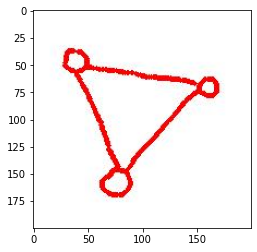

In [14]:
img = io.imread('user_input.jpg')
plt.imshow(img)

In [15]:
n = pp.io.network_recognition.from_image('user_input.jpg', num_nodes=3, node_radius=(20,40), threshold=20, max_edge_gap=5, min_edge_length=20, intersect_tolerance_factor=1.5)
print(n)
n.plot()

Uid:			0x14e09c33940
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	3
Number of edges:	5
